In [1]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
plt.style.use("bmh")
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

In [3]:
conn = duckdb.connect("../data/processed/nba.duckdb", read_only=True)

In [4]:
def min_to_seconds(_min):
    if not pd.isnull(_min):
        minutes, seconds = _min.split(":")
        minutes = float(minutes) * 60
        return int(minutes + int(seconds))
    

In [5]:
sql = """
SELECT 
    b.GAME_DATE, 
    b.HOME_AWAY,
    a.TEAM_ABBREVIATION, 
    a.PLAYER_NAME,
    CASE
        WHEN a.START_POSITION <> '' THEN 'Yes'
        ELSE 'No'
    END AS STARTER,
    CASE
        WHEN a.MIN IS NULL THEN 'No'
        ELSE 'Yes'
    END AS PLAYED,
    a.MIN, 
    a.REB, 
    a.AST, 
    a.STL, 
    a.BLK, 
    a.PTS,
    e.DEF_RATING AS PLAYER_DEF_RATING,
    a.PLUS_MINUS,
    b.OPPONENT, 
    c.OFF_RATING AS TEAM_OFF_RATING,
    d.OFF_RATING AS OPP_OFF_RATING
FROM players.tb_boxscore AS a
INNER JOIN teams.tb_game_logs AS b ON a.TEAM_ID = b.TEAM_ID AND a.GAME_ID = b.GAME_ID
INNER JOIN teams.tb_boxscore_advanced AS c ON a.TEAM_ID = c.TEAM_ID AND a.GAME_ID = c.GAME_ID
INNER JOIN teams.tb_boxscore_advanced AS d ON a.TEAM_ID <> d.TEAM_ID AND a.GAME_ID = d.GAME_ID
INNER JOIN players.tb_boxscore_advanced AS e ON a.PLAYER_ID = e.PLAYER_ID AND a.GAME_ID = e.GAME_ID
WHERE b.SEASON_YEAR = '2022-23'
ORDER BY b.GAME_DATE;
"""

games = conn.execute(sql).fetch_df()
games["MIN"] = games["MIN"].fillna("00:00")
games["MIN"] = games["MIN"].apply(min_to_seconds)
cols = ["REB", "AST", "STL", "BLK", "PTS", "PLUS_MINUS"]
for col in cols:
    games[col] = games[col].fillna(0)
games

,GAME_DATE,HOME_AWAY,TEAM_ABBREVIATION,PLAYER_NAME,STARTER,PLAYED,MIN,REB,AST,STL,BLK,PTS,PLAYER_DEF_RATING,PLUS_MINUS,OPPONENT,TEAM_OFF_RATING,OPP_OFF_RATING
0,2022-10-18,Away,PHI,Tobias Harris,Yes,Yes,2054,2.0,0.0,3.0,0.0,18.0,126.500000,-1.0,BOS,119.400002,129.899994
1,2022-10-18,Away,PHI,P.J. Tucker,Yes,Yes,1981,4.0,0.0,0.0,1.0,6.0,130.800003,-6.0,BOS,119.400002,129.899994
2,2022-10-18,Away,PHI,Joel Embiid,Yes,Yes,2236,15.0,5.0,0.0,1.0,26.0,139.199997,-13.0,BOS,119.400002,129.899994
3,2022-10-18,Away,PHI,Tyrese Maxey,Yes,Yes,2292,1.0,2.0,2.0,0.0,21.0,128.199997,-6.0,BOS,119.400002,129.899994
4,2022-10-18,Away,PHI,James Harden,Yes,Yes,2236,8.0,7.0,0.0,0.0,35.0,118.699997,1.0,BOS,119.400002,129.899994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12585,2022-12-23,Away,IND,Goga Bitadze,No,No,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,MIA,119.400002,114.900002
12586,2022-12-23,Away,TOR,Scottie Barnes,Yes,Yes,2415,10.0,4.0,2.0,0.0,25.0,112.199997,12.0,CLE,121.599998,110.300003
12587,2022-12-23,Away,LAC,Reggie Jackson,Yes,Yes,1510,2.0,2.0,1.0,0.0,4.0,125.000000,-13.0,PHI,121.300003,126.599998
12588,2022-12-23,Home,HOU,Jalen Green,Yes,Yes,2329,8.0,4.0,2.0,0.0,23.0,106.099998,6.0,DAL,110.400002,115.500000


In [6]:
conn.close()

In [25]:
df2.query("GAME_NUM == 13")

,GAME_DATE,HOME_AWAY,TEAM_ABBREVIATION,PLAYER_NAME,STARTER,PLAYED,MIN,REB,AST,STL,BLK,PTS,PLAYER_DEF_RATING,PLUS_MINUS,OPPONENT,TEAM_OFF_RATING,OPP_OFF_RATING,GAME_NUM
4270,2022-11-09,Away,UTA,Lauri Markkanen,Yes,Yes,1881,8.0,0.0,0.0,1.0,32.0,137.300003,-12.0,ATL,119.0,114.400002,13


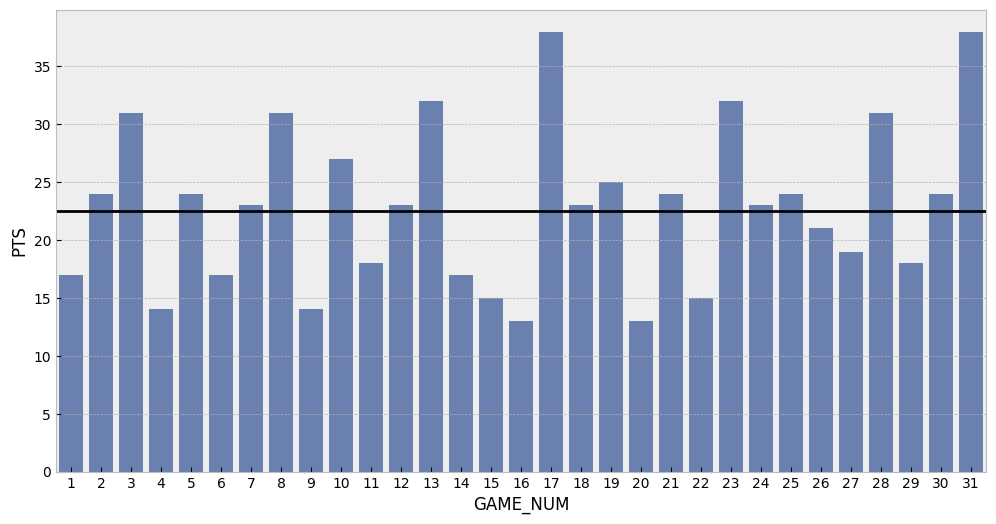

In [32]:
df2 = games.query("PLAYER_NAME == 'Lauri Markkanen'")
df2 = df2.sort_values("GAME_DATE")
df2["GAME_NUM"] = range(1, len(df2)+1)
sns.barplot(x="GAME_NUM", y="PTS", data=df2, color="#5f7dba")
plt.axhline(y=22.5, color='black')

In [ ]:
def player_vs_line(df, player_name, line):
    df2 = df.query(f"PLAYER_NAME == '{player_name}'")
    

<AxesSubplot: xlabel='GAME_DATE', ylabel='PTS'>

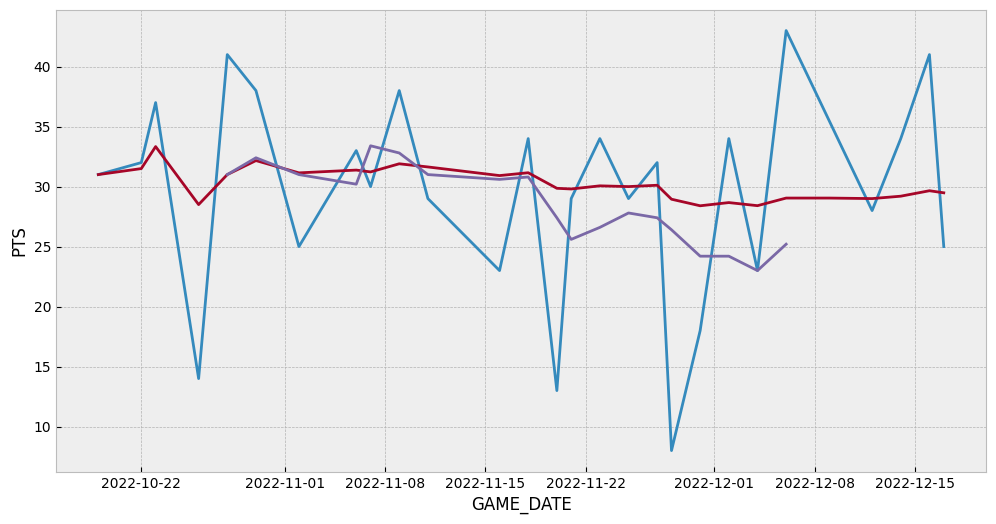

In [33]:
sns.lineplot(x="GAME_DATE", y="PTS", data=games.reset_index())
sns.lineplot(x="GAME_DATE", y="PTS", data=teste)
sns.lineplot(x="GAME_DATE", y="PTS", data=teste2)